# Simulating the Effect of Larval Dietary Restriction on *C. elegans*
Rachel Goodridge<br>COGS18 Final<br>12 June 2020

## Background
<u>Worms Introduction</u><br>*Caenorhabditis elegans* is a millimeter long roundworm (or nematode) found worldwide in soil and rotting plant matter. It commonly serves as an ideal model organism for various types of genetic and evolutionary experimental studies due to its fast life cycle, ease of maintenance, and simple neurological structure. [Click here to watch a brief informational *C. elegans* video.](https://www.youtube.com/watch?v=zjqLwPgLnV0)

<u>My Thesis Topic and Research</u><br>I'm currently pursuing my MS in Biology (Evolution/Behavior/Ecology department), conducting research in a lab led by Dr. Scott Rifkin. I study the evolution of a particular phase of the worm life cycle called dauer [**Figure 1**]. This stage of development is an intermediate larval stage during which the worm can "choose" to go into a stasis-like state given difficult environmental conditions (e.g. overcrowding or lack of food) [Hu 2007]. As part of my research, I am developing a population ecology/evolution model in Python to simulate the development of a group of individuals and/or their offspring; their interactions with each other; and their responses to specific environmental conditions. The model takes many realistic factors into account (e.g. genetics and the role of "randomness in decision-making") [Avery 2014] when determining if a particular worm will go into the dauer phase of development. I've recently begun studies in the labortory to improve particular aspects of the model and, eventually, to test the accuracy of its predictions.

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**Figure 1**
<img src=https://www.wormatlas.org/dauer/introduction/Images/DIntroFIG1lr.jpg width="500">

<u>My Current Project in Lab</u><br>One aspect of my model I've been testing in lab (before COVID-19 put a temporary hold on research) is whether the quantity of food available to a worm determines its transition to the next stage of development or if it is simply a matter of time passing. Studies show that life span is food-dependent, specifically adult worms have an increased life span if fed a restricted diet [e.g. Klass 1977, Lee et al. 2006]. However, it is unknown whether larval stages experience the same effect. To test this, I've designed an experiment in lab with four treatment groups of L1 worms, each fed a different concentration of *E. coli* (6 mg/mL, 4.8 mg/mL, 3.6 mg/mL, or 2.4 mg/mL). If the effect is the same on larvae as it is on adults, the expected outcome would be statiscially different lengths of time spent in L1 before molting to L2/L2d. To determine when the worms are molting, I have a specific strain of *C. elegans* with a gfp (green fluorescent protein) marker on the molting gene that makes the worms glow under an epifluorescent microscope when they're molting. The glow will last for about three hours, peaking in intensity when they molt [Monsalve et al. 2011]. One complication, however, is that if the worms are not completely synchronized in age (i.e. they don't all start from time zero in their life stage), and depending on how far apart in age they are, the results may be confounded by this variation. My objective is to create a simulation that will test whether unsynchronized worms can produce statistically significant results.

## Project Description
<u>Goal</u><br>To create a simulation that tests whether unsynchronized L1 worms can produce statistically significant results when comparing between treatment groups.
<br>
<br>
<u>Coding Project Overview</u>
- worms are sorted into four treatment groups with varying *E. coli* concentrations (6 mg/mL, 4.8 mg/mL, 3.6 mg/mL, or 2.4 mg/mL)
- each worm is given a "starting age" and an age they must reach before molting (experimentally determined [e.g. Avery 2014] and dependent on their treatment, assuming that less food will lengthen the amount of time spent in L1)
- subtracting the "starting age" from the "molting age" will determine how much longer a worm will remain in L1
- worms will get placed into "bins" depending on how long it takes for them to molt and taking into account the length of time they glow
- these bins, each three hours wide (how long they glow), represent the observed molting worms for each sample taken
- the quantity of bins and amount of time overlap between the bins are calculated based on the sampling frequency (e.g. if samples are collected more frequently, there will be more bins with more overlap between each bin), see **Figure 2** below
- t tests determine the statistical significance between the four treatment groups
- the fraction of worms glowing over time is plotted for visual reference, see **Figure 3** (code cell) under "Demonstration"

&emsp;&emsp;**Figure 2**
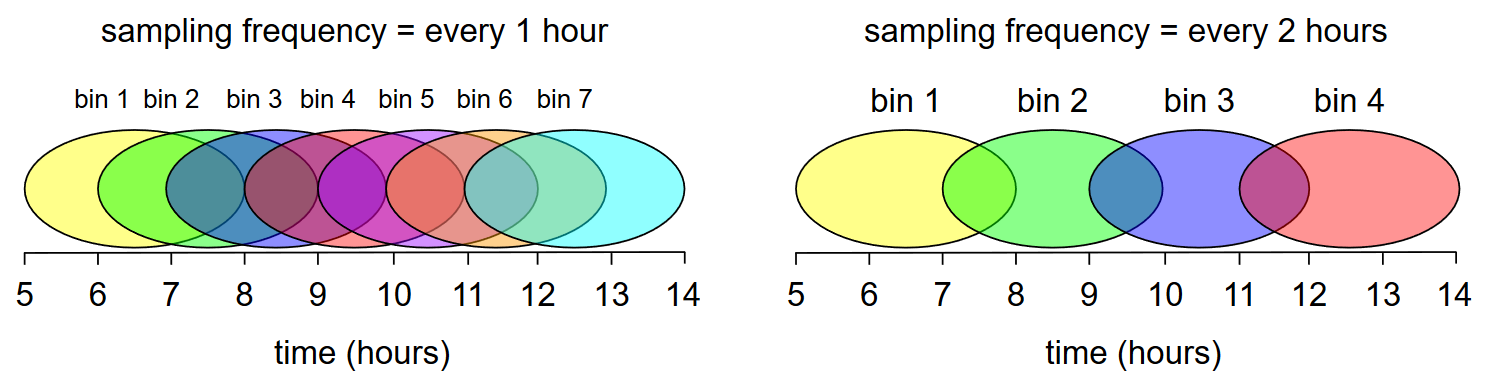


<u>Adjustable Variables</u>
- hour : sample frequency (i.e. sample once every ___ hours)
- spread : how many hours the unsynchronized worms are spread out in age
- size : the number of worms in each treatment group
- diff : the difference in means between treatment groups in hours ~ UNKNOWN ~

**Please run all of the following notebook cells to view the demonstration below!**

In [ ]:
from ipywidgets import interact
from IPython.core.display import display, HTML
from module import run

In [ ]:
# test cell provided to check that the functions are working properly
!pytest

## Demonstration
**Feel free to play with the sliding features if desired!**

The p values above the graph are from pairwise t tests, listed in order of the groups.
- The first one compares blue and yellow groups (6 mg/mL vs 4.8 mg/mL, respectively).
- The second one compares yellow and green groups (4.8 mg/mL vs 3.6 mg/mL, respectively).
- The third one compares green and red groups (3.6 mg/mL vs 2.4 mg/mL, respectively).

In [ ]:
##### Figure 3 #####

# this allows for a larger viewing window in jupyter notebook (to see the entire graph without scrolling)
display(HTML("<style>div.output_scroll { height: 40em; }</style>"))

# this widget creates an interactive feature with set bounds and step-sizes
interact(run, hour = (0.5,2,0.5), spread = (2,8,1), size = (40,100,10), diff = (0.5, 3, 0.5));

## Results
The simulations show how modifying different variables impacts the statistical significance between the treatment groups. The most desirable combination of variables includes sampling every half hour, synchronizing the worms (less than two hours apart in age), and using treatment group sizes of 100. Also, the larger the time difference between treatment groups, the easier it will be to differentiate between them. The variable that seemed to have the biggest effect on t test significance is synchronicity. Changing the "spread" of the worms greatly changes the results in comparison to changing the sampling frequency or size of the groups. Thus, it will be crucial to manipulate the worms in laboratory experiments so they are as synchronous in age as possible. This Python simulation was helpful for clarifying confounding variables that need to be controlled in lab.

## References
1. Avery, Leon. “A Model of the Effect of Uncertainty on the C Elegans L2/L2d Decision.” PLoS ONE, vol. 9, no. 7, 16 July 2014, doi:10.1371/journal.pone.0100580.
2. Hu, P.J., Dauer (August 08, 2007), *WormBook*, ed. The *C. elegans* Research Community, WormBook, doi/10.1895/wormbook.1.144.1, http://www.wormbook.org.
3. Klass, Michael R. “Aging in the Nematode Caenorhabditis Elegans: Major Biological and Environmental Factors Influencing Life Span.” Mechanisms of Ageing and Development, vol. 6, 25 Jan. 1977, pp. 413–429., doi:10.1016/0047-6374(77)90043-4.
4. Lee, Garrick D., et al. “Dietary Deprivation Extends Lifespan in Caenorhabditis Elegans.” Aging Cell, vol. 5, no. 6, 26 Aug. 2006, pp. 515–524., doi:10.1111/j.1474-9726.2006.00241.x.
5. Monsalve, Gabriela&nbsp;C., et al. “LIN-42/PERIOD Controls Cyclical and Developmental Progression of C.&nbsp;Elegans Molts.” Current Biology, vol. 21, no. 24, 20 Dec. 2011, pp. 2033–2045., doi:10.1016/j.cub.2011.10.054.